# The SQL Murder Mystery

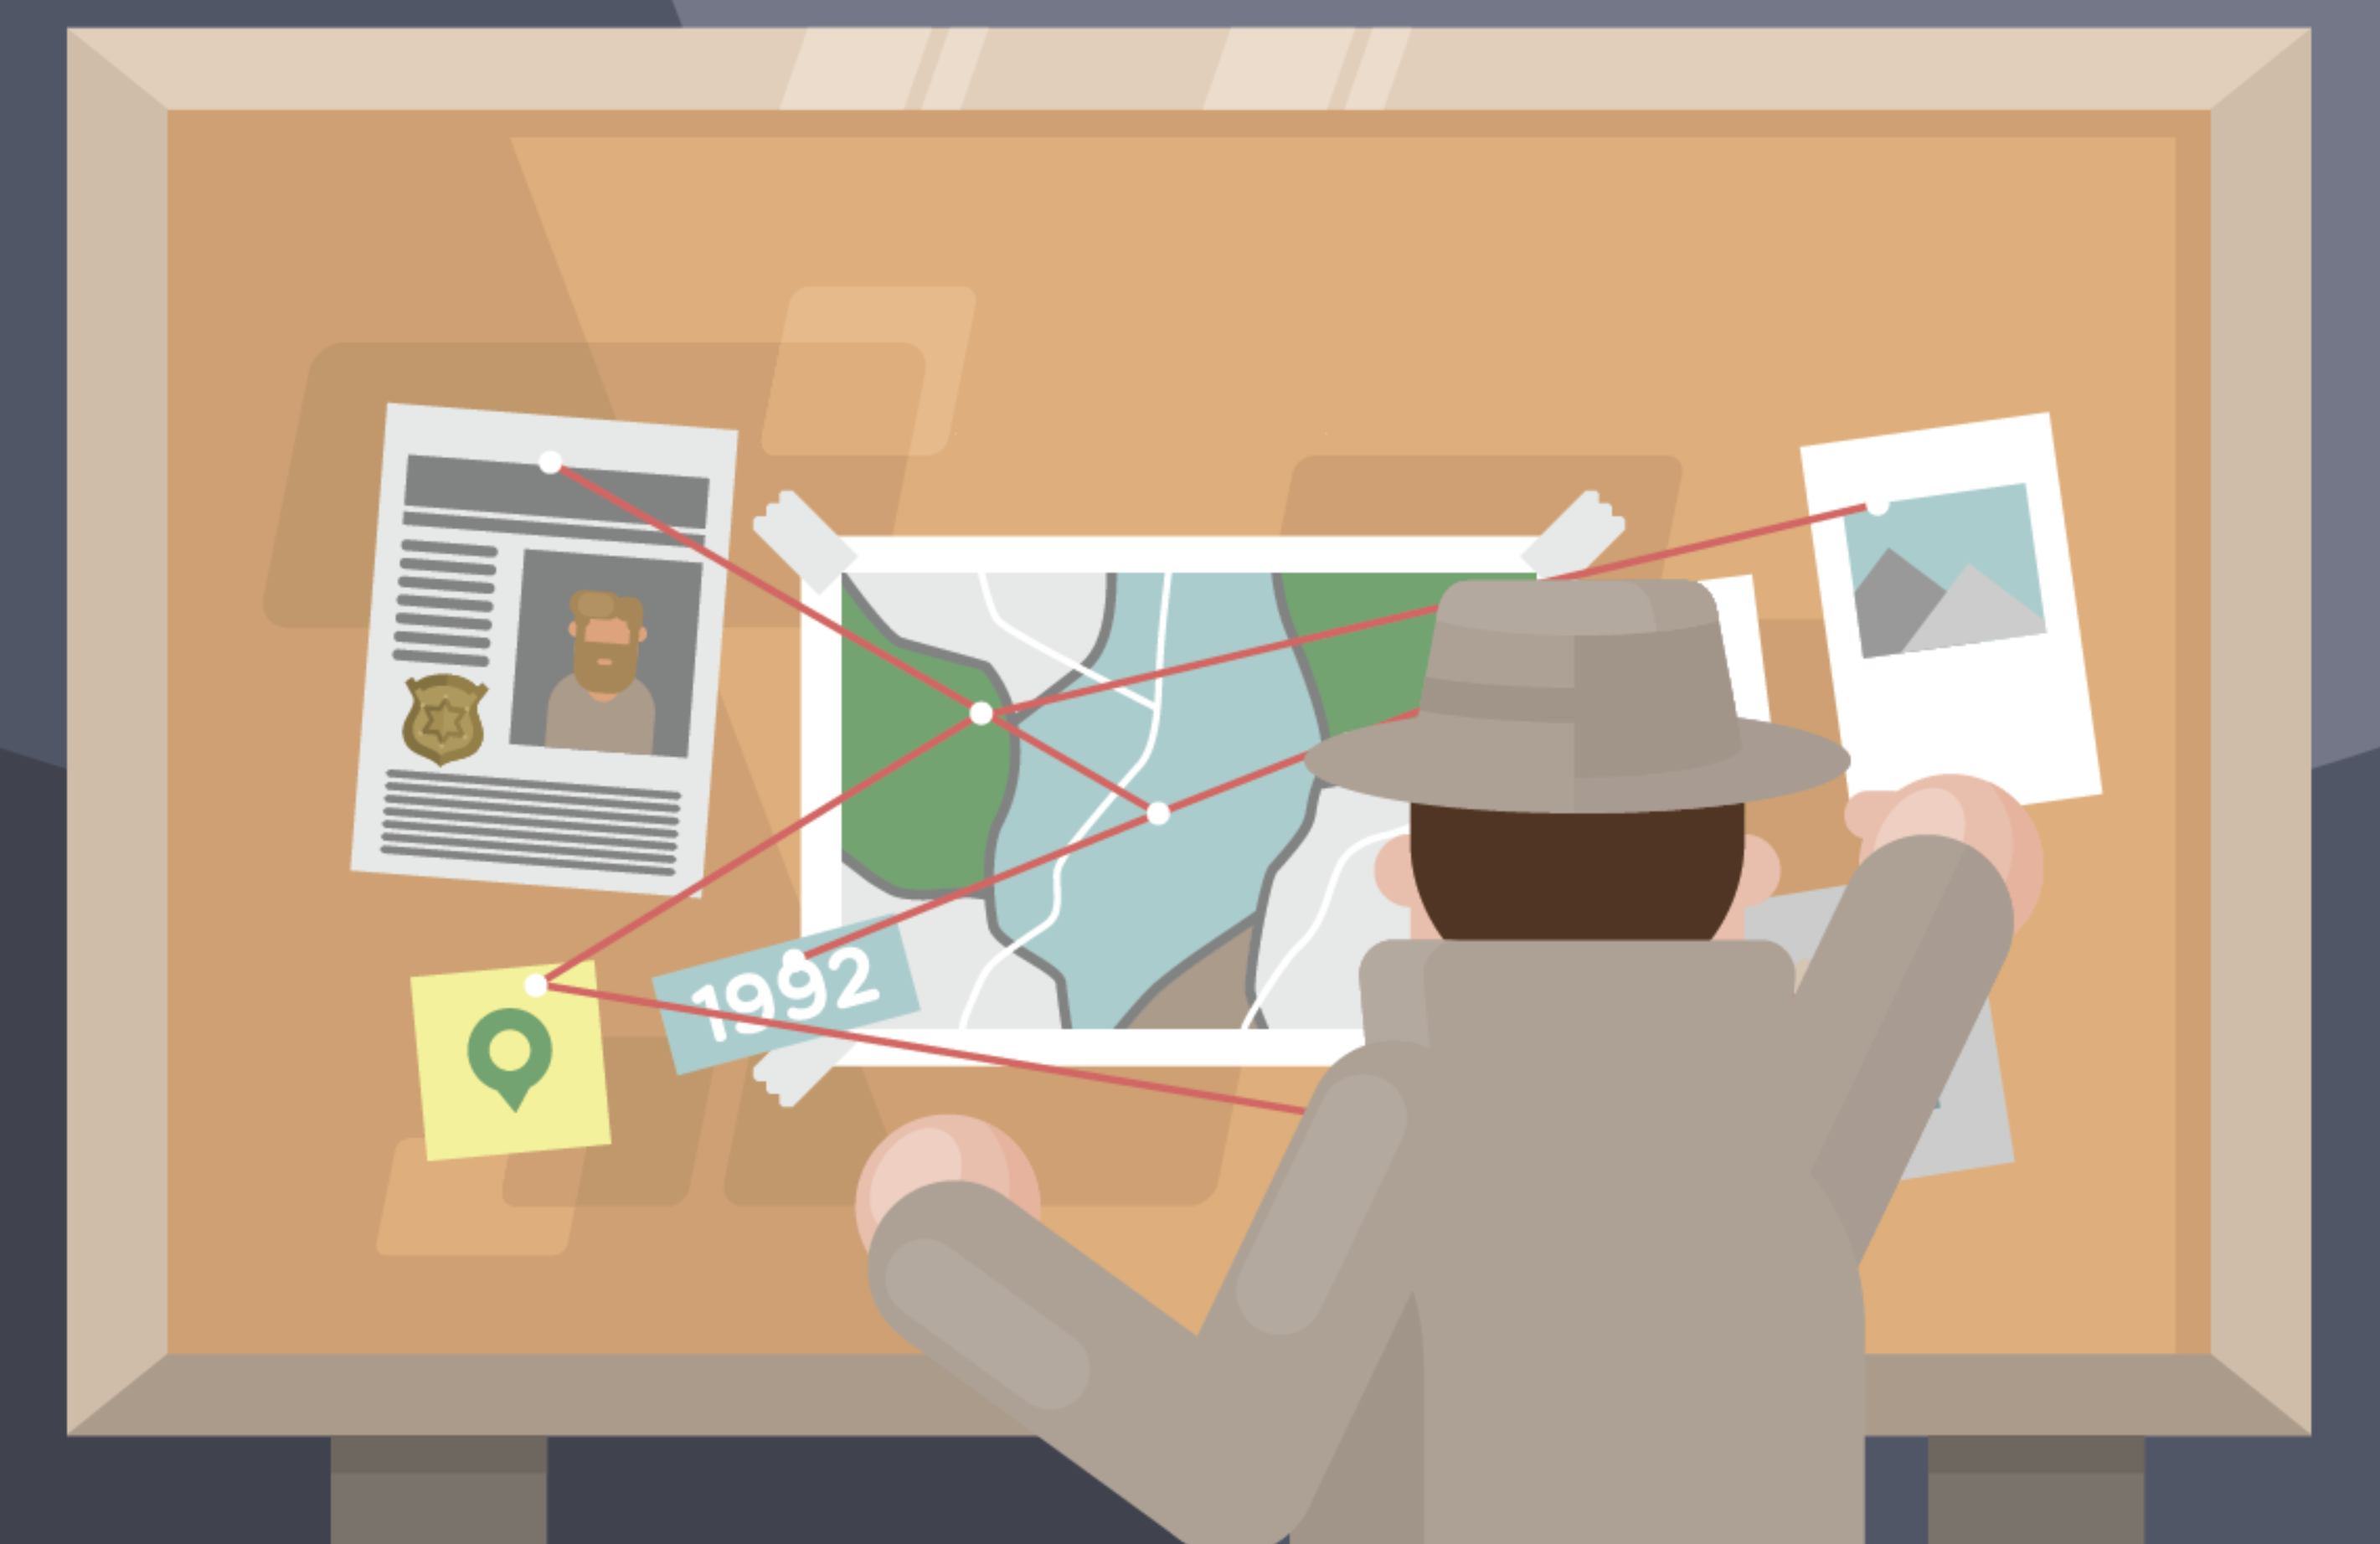

There's been a Murder in SQL City! The SQL Murder Mystery is designed to be both a self-directed lesson to learn SQL concepts and commands and a fun game for experienced SQL users to solve an intriguing crime.

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a ​murder​ that occurred sometime on ​Jan.15, 2018​ and that it took place in ​SQL City​. Start by retrieving the corresponding crime scene report from the police department’s database.

### The database schema

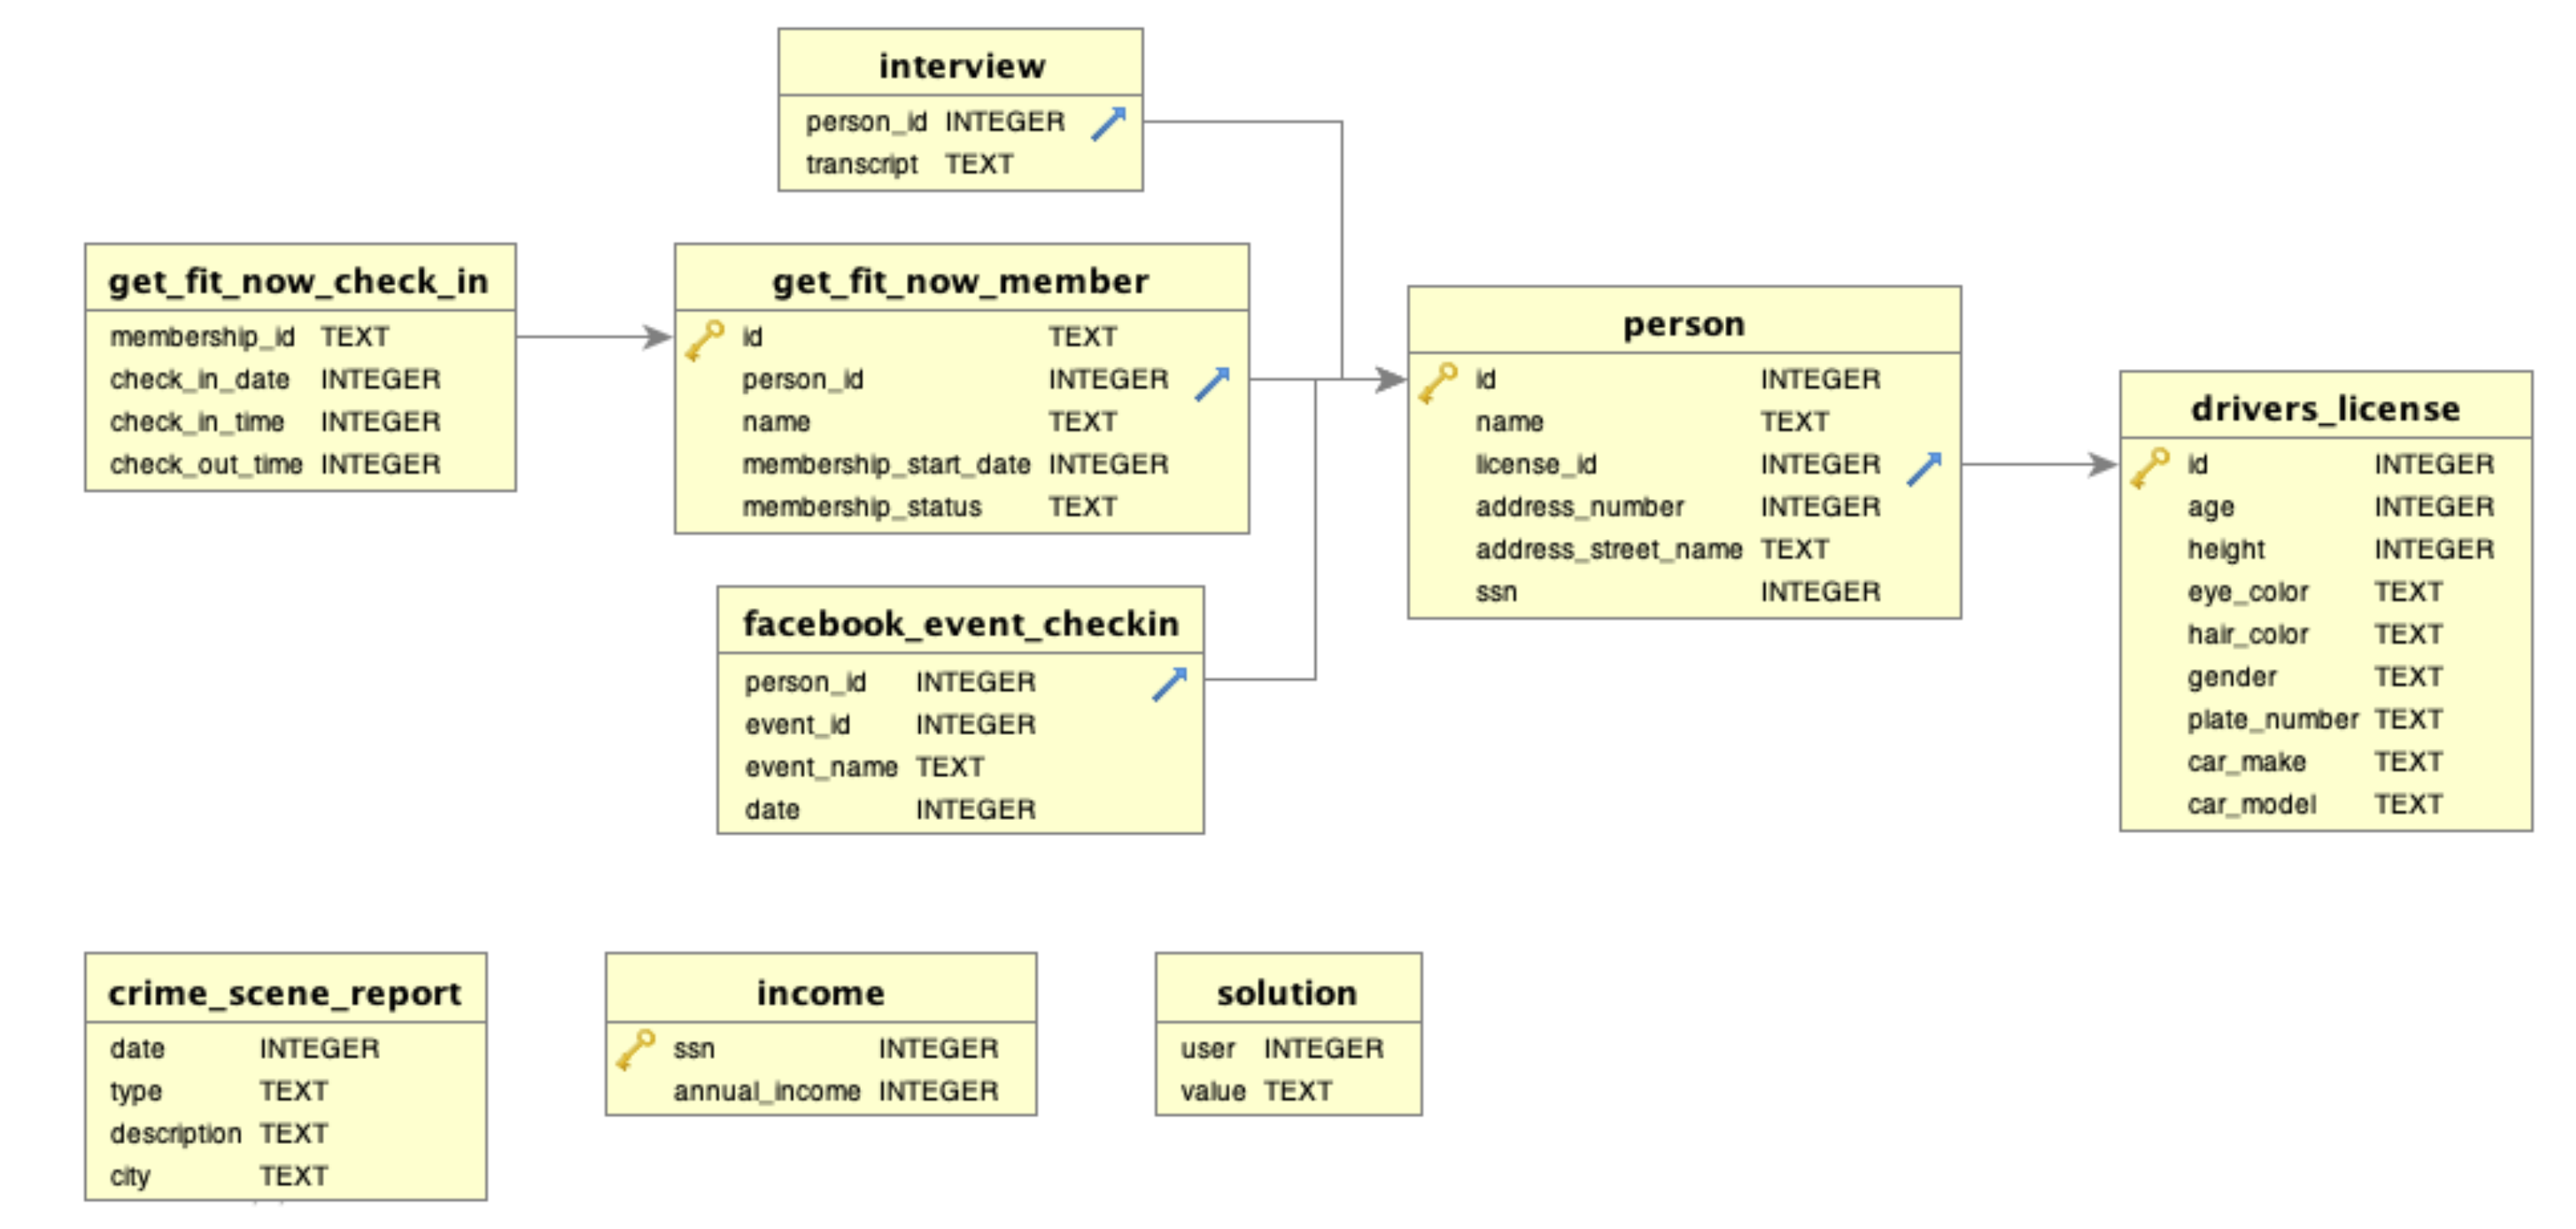

In [1]:
# Firstly, let's get the report regarding the crime we need to solve.

Select * From 'crime_scene_report'
Where date = 20180115 AND city = 'SQL City' AND type = 'murder'

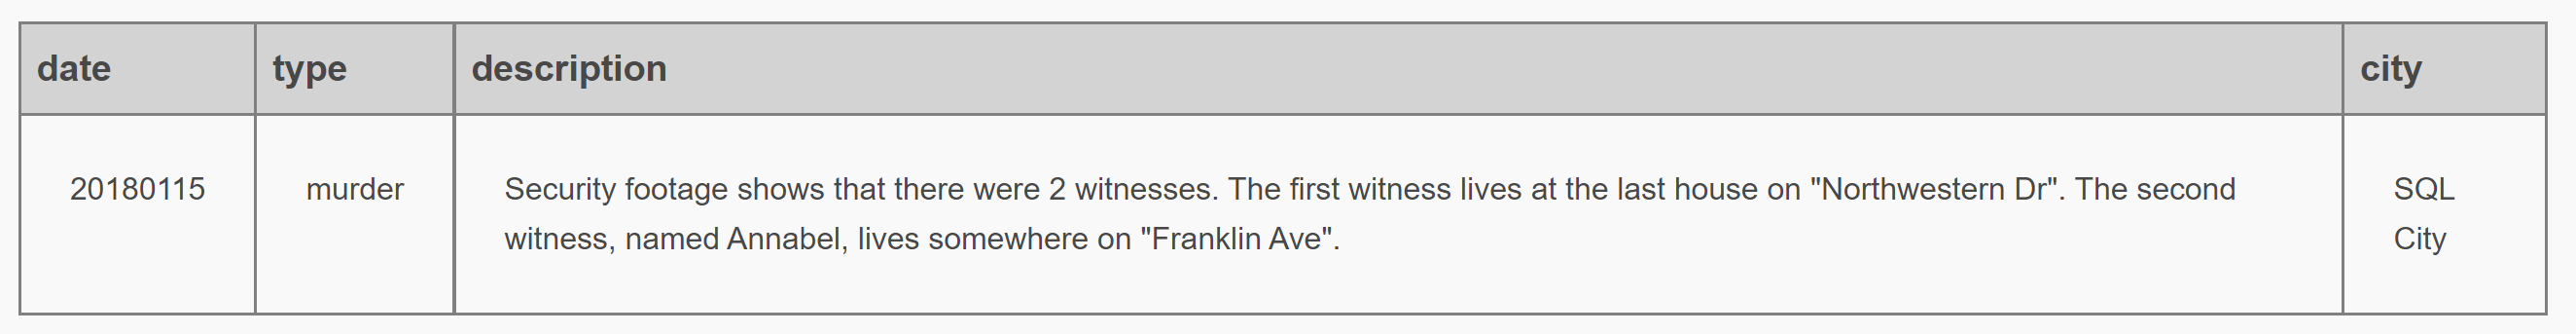

In [ ]:
# Secondly, let's find the two witnesses

WITH firstP AS
(Select * From 'person'
INNER JOIN 'interview'
ON 'person'.id = 'interview'.person_id
Where 'person'.address_street_name = "Franklin Ave" AND 'person'.name LIKE 'Annabel%'
),
secondP AS
(Select * From 'person'
INNER JOIN 'interview'
ON 'person'.id = 'interview'.person_id
Where 'person'.address_street_name = "Northwestern Dr"
ORDER BY 'person'.address_number DESC
LIMIT 1
)
Select * From secondP
UNION ALL
Select * From firstP

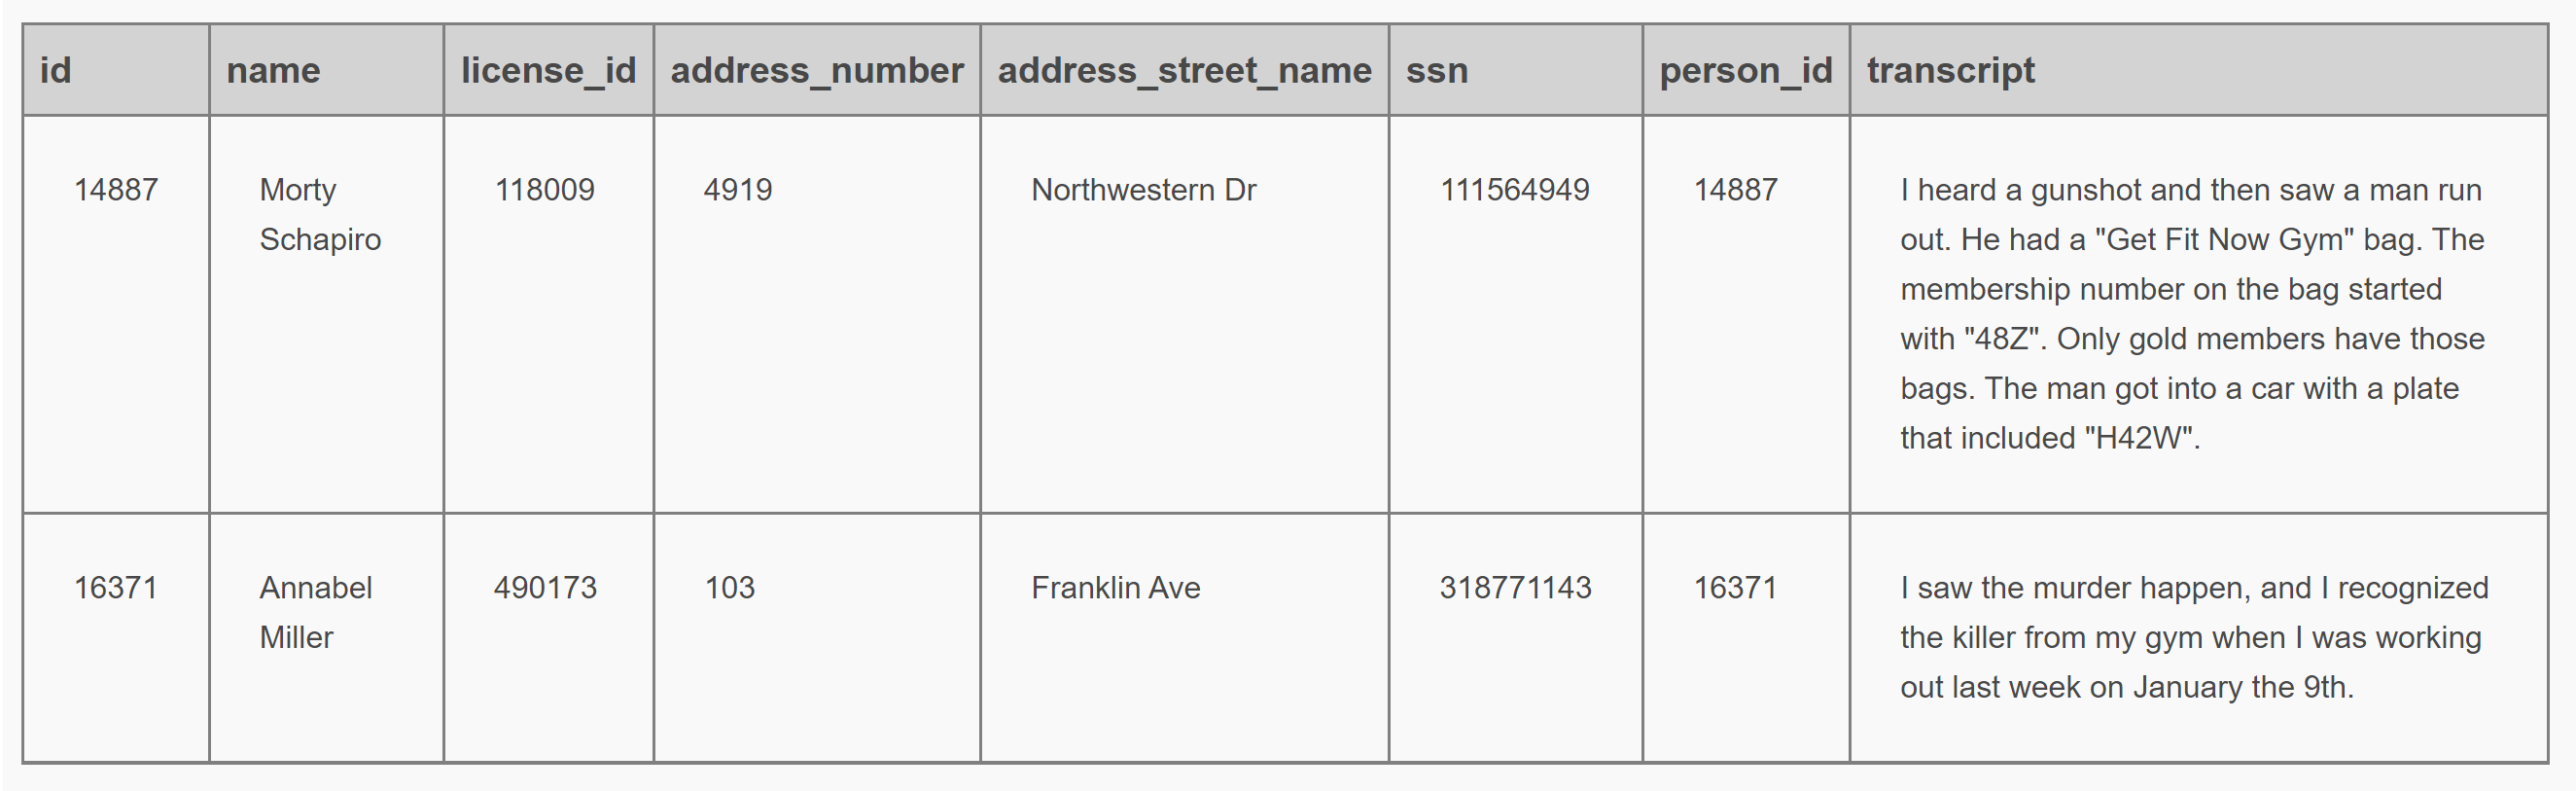

In [ ]:
# Thirdly, let's look for the murderer

With hulp AS
(Select * From 'get_fit_now_member'
JOIN 'get_fit_now_check_in'
ON 'get_fit_now_member'.id = 'get_fit_now_check_in'.membership_id
Where 'get_fit_now_member'.id LIKE '48Z%' AND check_in_date = 20180109
)
Select hulp.person_id, hulp.name, person.license_id, drivers_license.plate_number From hulp
JOIN 'person'
ON hulp.person_id = person.id
JOIN 'drivers_license'
on person.license_id = drivers_license.id

Found him:
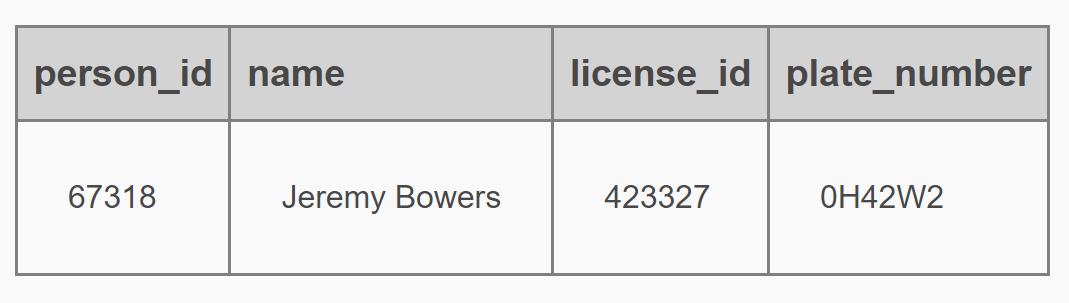

But he is not alone and was hired by somebody. Let's find out whom it is.

In [ ]:
# In order to do os, let's look at his testimony

Select * From 'interview'
Where person_id = 67318

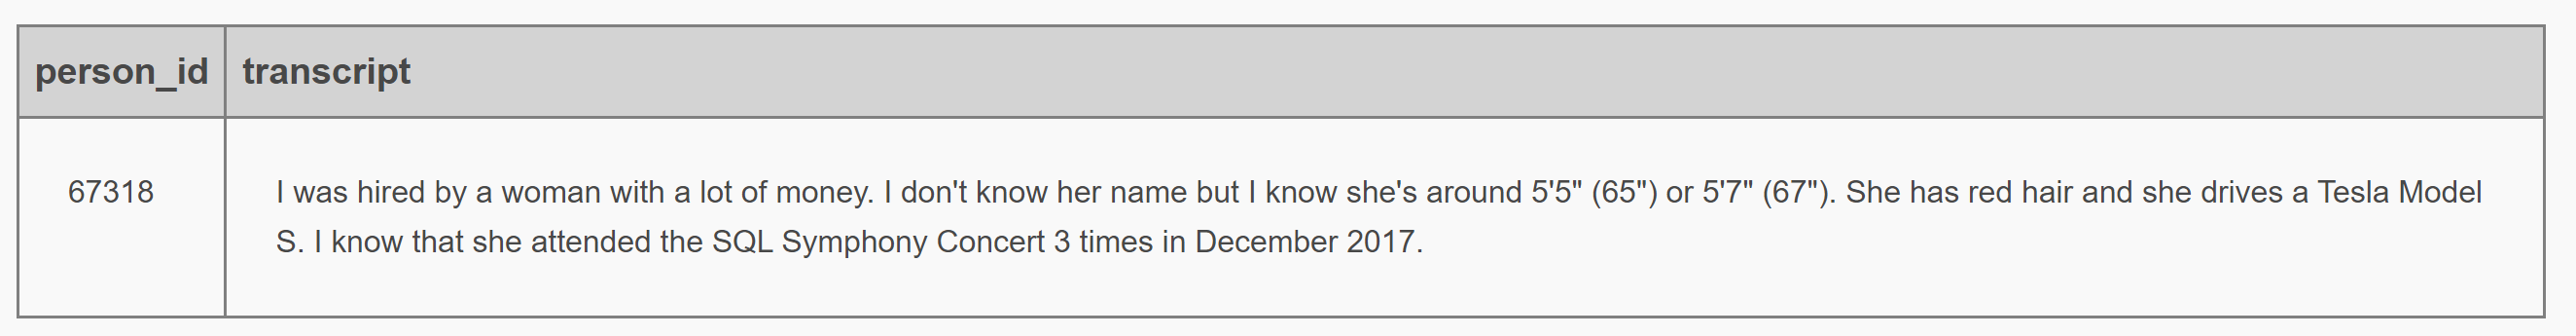

In [ ]:
# Let's look for the person that maches this description

With hulp AS(             
Select COUNT(person_id) AS Count_id, * From 'facebook_event_checkin'
WHERE event_name = 'SQL Symphony Concert' AND date LIKE '2017%'
GRoup BY person_id
)
Select hulp.Count_id, hulp.person_id, hulp.event_name, hulp.date, person.name, person.id, person.license_id, dl.height, dl.age, dl.car_make, dl.car_model 
From hulp
JOIN 'person'
ON 'hulp'.person_id = 'person'.id
JOIN 'drivers_license' AS dl
ON 'person'.license_id = dl.id
Where Count_id > 2 AND car_make = 'Tesla'


Found her:
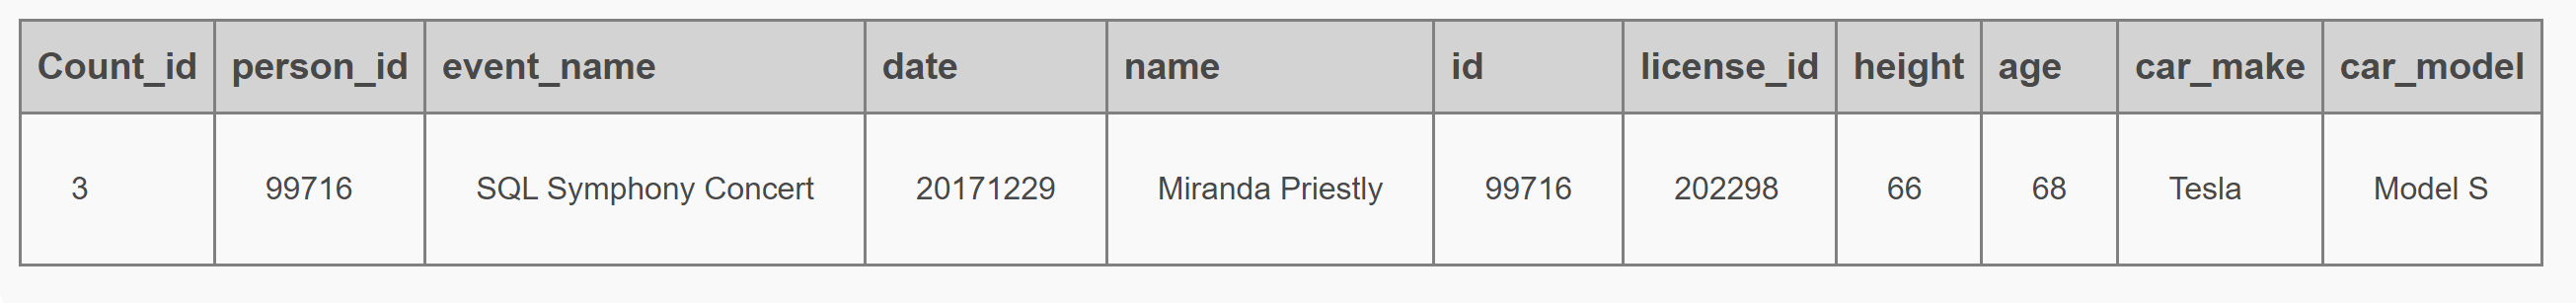

Play the game yourself: <br>https://mystery.knightlab.com/